In [123]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colorbar import Colorbar
import matplotlib.gridspec as Gridspec

In [51]:
chennai = pd.concat([pd.read_csv("chennai_1930_1969.csv"), pd.read_csv("chennai_1970_2019.csv"), ])

In [52]:
chennai

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-01,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
1,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-02,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
2,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-03,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
3,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-04,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
4,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-05,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
5,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-06,6.1,",,I",NaN,NaN,NaN,NaN,NaN,NaN
6,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-07,28.7,",,I",NaN,NaN,NaN,NaN,NaN,NaN
7,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-08,2.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
8,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-09,0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
9,IN020040900,"MADRAS MINAMBAKKAM, IN",13.00,80.183,16.0,1930-01-10,0.5,",,I",NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
chennai['DATE'] = pd.to_datetime(chennai.DATE)

In [54]:
sel_minambakkam = chennai.STATION.str.contains("IN020040900")

In [56]:
minambakkam = xr.Dataset({'TMAX':(['Time'], chennai.loc[sel_minambakkam, 'TMAX']),
                          'TMIN':(['Time'], chennai.loc[sel_minambakkam, 'TMIN']),
                          'PRCP':(['Time'], chennai.loc[sel_minambakkam, 'PRCP'])},
                        coords={'Time': (['Time'], chennai.loc[sel_minambakkam, 'DATE'])})

In [57]:
minambakkam

<xarray.Dataset>
Dimensions:  (Time: 31515)
Coordinates:
  * Time     (Time) datetime64[ns] 1930-01-01 1930-01-02 ... 2019-05-26
Data variables:
    TMAX     (Time) float64 nan nan nan nan nan nan ... nan 38.8 38.6 nan nan
    TMIN     (Time) float64 nan nan nan nan nan nan ... 27.8 28.0 28.5 27.8 28.4
    PRCP     (Time) float64 0.0 0.0 0.0 0.0 0.0 6.1 ... nan nan nan nan nan nan

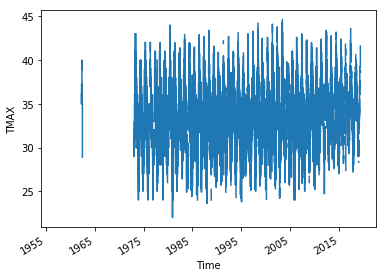

In [58]:
minambakkam.TMAX.plot()

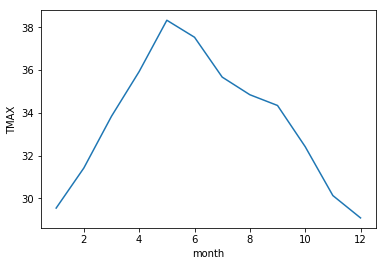

In [59]:
minambakkam.TMAX.groupby(minambakkam.Time.dt.month).mean().plot()

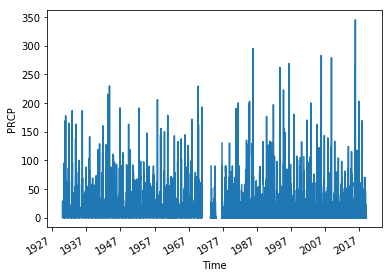

In [74]:
minambakkam.PRCP.plot()

In [60]:
def compute_monthlyMean(gxr):
    return gxr.groupby(gxr.Time.dt.month).mean()

In [67]:
minambakkam_monthlyMean = minambakkam.TMAX.groupby(minambakkam.Time.dt.year).apply(compute_monthlyMean)

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [70]:
minambakkam_monthlyMean['PRCP'] = minambakkam.PRCP.groupby(minambakkam.Time.dt.year).apply(compute_monthlyMean)

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


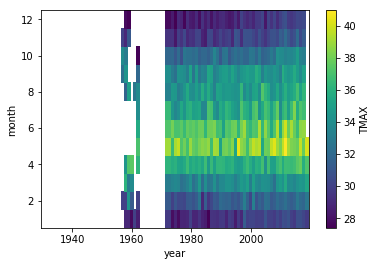

In [68]:
minambakkam_monthlyMean.T.plot()

In [112]:
minambakkam_refyears = minambakkam.sel(Time=slice("1960-01-01", "1989-12-31"))

In [113]:
TMAX_refmean = minambakkam_refyears.TMAX.groupby(minambakkam_refyears.Time.dt.month).mean()

In [114]:
TMAX_refmean

<xarray.DataArray 'TMAX' (month: 12)>
array([28.842889, 30.766125, 33.303625, 35.804279, 38.12591 , 37.415068,
       35.071678, 34.456637, 33.844898, 32.020814, 29.47765 , 28.481406])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [142]:
def compute_TMAX_anom(gxr):
    return gxr.groupby(gxr.Time.dt.month).mean() - TMAX_refmean

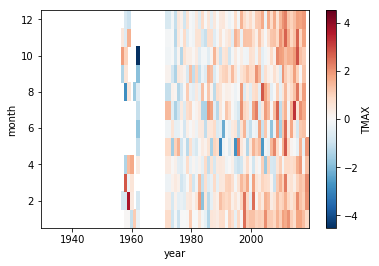

In [143]:
minambakkam.TMAX.groupby(minambakkam.Time.dt.year).apply(compute_TMAX_anom).T.plot()

In [117]:
tmax_anom = minambakkam.sel(Time=slice("1970", "2020")).TMAX.groupby(minambakkam.sel(Time=slice("1970", "2020")).\
                                                                     Time.dt.year).apply(compute_anom).T

In [118]:
tmax_anom

<xarray.DataArray 'TMAX' (month: 12, year: 48)>
array([[      nan,  0.838929, -0.914317, ...,  1.799968,  1.393953,  0.914254],
       [      nan,  0.407788, -0.766125, ...,  1.312822,  1.043875,  2.079329],
       [      nan, -0.226702,  0.234837, ...,  1.329709,  1.146375,  2.139232],
       ...,
       [      nan, -0.163672, -0.020814, ...,  1.349774,  1.101408,       nan],
       [      nan, -0.07765 , -0.019316, ...,  0.93485 ,  1.804168,       nan],
       [      nan, -0.712175, -0.112985, ...,  1.77314 ,  1.947166,       nan]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * year     (year) int64 1970 1973 1974 1975 1976 ... 2015 2016 2017 2018 2019

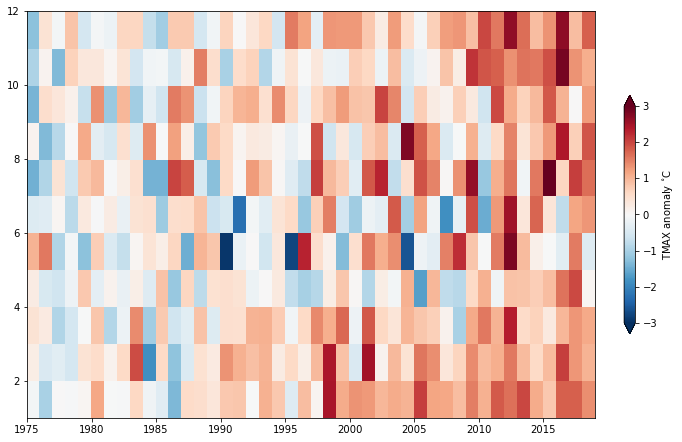

In [130]:
plt.close(1)
plt.figure(1, figsize=(277/25.4, 190/25.4))
gs = Gridspec.GridSpec(5, 2, height_ratios=[1]*5, width_ratios=[1,0.02], wspace=0.1)
ax = plt.subplot(gs[:, 0])

tmax_anom = minambakkam.sel(Time=slice("1970", "2020")).TMAX.groupby(minambakkam.sel(Time=slice("1970", "2020")).\
                                                                     Time.dt.year).apply(compute_anom)
pcm = ax.pcolormesh(tmax_anom.year, np.arange(1, 13), tmax_anom.T, cmap='RdBu_r', vmin=-3, vmax=3)
ax.set_xlim(1975, 2019)

colorbar_ax = plt.subplot(gs[1:4, 1])
cbr = Colorbar(ax = colorbar_ax, mappable=pcm, extend='both')
cbr.ax.set_ylabel("TMAX anomaly $^{\circ}$C")
plt.show()

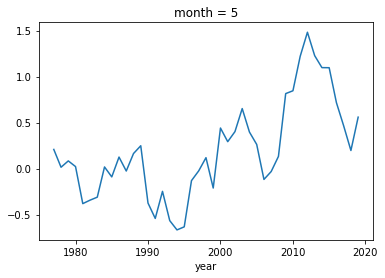

In [120]:
tmax_anom.sel(month=5).rolling(year=5).mean().plot()

In [131]:
def compute_monthlyCumulative(gxr):
    return gxr.groupby(gxr.Time.dt.month).sum()

In [135]:
minambakkam.PRCP.groupby(minambakkam.Time.dt.year).apply(compute_monthlyCumulative)

<xarray.DataArray 'PRCP' (year: 88, month: 12)>
array([[3.730e+01, 5.620e+01, 3.000e-01, ..., 6.989e+02, 5.193e+02, 1.168e+02],
       [1.400e+00,       nan, 0.000e+00, ..., 1.717e+02, 4.022e+02, 2.616e+02],
       [0.000e+00, 1.750e+01, 0.000e+00, ..., 5.495e+02, 2.927e+02, 8.030e+01],
       ...,
       [9.200e+00, 0.000e+00, 0.000e+00, ..., 3.363e+02, 5.355e+02, 5.610e+01],
       [0.000e+00, 1.000e+00, 5.000e-01, ..., 2.558e+02, 7.570e+01, 9.530e+01],
       [0.000e+00, 3.000e+00, 0.000e+00, ...,       nan,       nan,       nan]])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * year     (year) int64 1930 1931 1932 1933 1934 ... 2015 2016 2017 2018 2019

In [136]:
minambakkam['PRCP_cumulative'] = minambakkam.PRCP.groupby(minambakkam.Time.dt.year).apply(compute_monthlyCumulative)

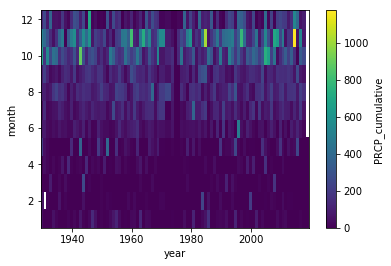

In [138]:
minambakkam['PRCP_cumulative'].T.plot()

In [167]:
minambakkam

<xarray.Dataset>
Dimensions:          (Time: 31515, month: 12, year: 88)
Coordinates:
  * Time             (Time) datetime64[ns] 1930-01-01 1930-01-02 ... 2019-05-26
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * year             (year) int64 1930 1931 1932 1933 ... 2016 2017 2018 2019
Data variables:
    TMAX             (Time) float64 nan nan nan nan nan ... 38.8 38.6 nan nan
    TMIN             (Time) float64 nan nan nan nan nan ... 28.0 28.5 27.8 28.4
    PRCP             (Time) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan
    PRCP_cumulative  (year, month) float64 37.3 56.2 0.3 0.0 ... nan nan nan nan

In [170]:
PRCP_cum_refmean = minambakkam.PRCP_cumulative.sel(year=slice("1930", "1960")).\
                                                        groupby(minambakkam.sel(year=slice("1930", "1960")).\
                                                                   month).mean()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/groupby.py:631: FutureWarning: Default reduction dimension will be changed to the grouped dimension after xarray 0.12. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


In [172]:
PRCP_cum_refmean.sum()

<xarray.DataArray 'PRCP_cumulative' ()>
array(1224.218817)

In [174]:
def compute_PRCP_anom(gxr):
    return gxr.groupby(gxr.month).mean() - PRCP_cum_refmean

In [175]:
prcp_anom = minambakkam.PRCP_cumulative.groupby(minambakkam.year).apply(compute_PRCP_anom)

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


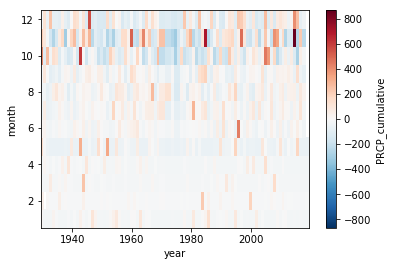

In [176]:
prcp_anom.T.plot()

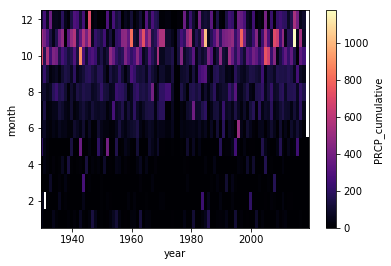

In [178]:
minambakkam.PRCP_cumulative.T.plot(cmap='magma')